## **Terryanda Naufaldo Arhaby**
## **1103213107**

In [10]:
# Import library

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [11]:
# Load the CSV file
file_path = '/content/CitarumWater.csv'
data = pd.read_csv(file_path)

# Menampilkan beberapa baris dari dataset yang digunakan dan tipe data apa yang dipakai
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             2500 non-null   int64  
 1   NamaSungai     2500 non-null   object 
 2   TitikPantau    2500 non-null   object 
 3   Waktu          2500 non-null   object 
 4   pH             2500 non-null   float64
 5   Temp           2500 non-null   object 
 6   TSS            2500 non-null   float64
 7   DO             2500 non-null   float64
 8   BOD            2500 non-null   float64
 9   COD            2500 non-null   float64
 10  Nitrat         2500 non-null   float64
 11  FecalColiform  2500 non-null   float64
 12  Fosfat         2500 non-null   float64
 13  O2             2500 non-null   object 
 14  IP             2500 non-null   float64
 15  Class          2500 non-null   int64  
dtypes: float64(9), int64(2), object(5)
memory usage: 312.6+ KB


(   No NamaSungai             TitikPantau       Waktu    pH     Temp   TSS  \
 0   1    Citarum             Wangisagara  18/04/2018  7.57  25.55°C  11.0   
 1   2    Citarum                   Koyod  18/04/2018  7.69  25.55°C  13.0   
 2   3    Citarum   Setelah IPAL Cisirung  18/04/2018  7.39  25.55°C  15.0   
 3   4    Citarum                 Nanjung  18/04/2018  7.49  25.55°C  17.0   
 4   5    Citarum  Outlet Waduk Jatiluhur  18/04/2018  7.17  25.55°C   6.0   
 
      DO   BOD    COD  Nitrat  FecalColiform  Fosfat O2    IP  Class  
 0  6.11  3.30   6.10    1.08        17000.0   0.043  -  5.12      3  
 1  6.20  5.31  12.50    1.85        28000.0   0.011  -  5.91      3  
 2  3.61  7.40  23.50    1.25        90000.0   0.230  -  7.76      3  
 3  3.17  8.13  27.50    1.21       300000.0   0.057  -  9.61      3  
 4  6.82  2.89   5.44    1.04         3000.0   0.110  -  2.44      2  ,
 None)

In [12]:
# Membersihkan dataset
# Menghapus simbol '°C' dari kolom Temp dan mengubahnya menjadi tipe float
data['Temp'] = data['Temp'].str.replace('°C', '').astype(float)

# Menghapus kolom yang tidak relevan atau yang berisi nilai non-numerik
data_cleaned = data.drop(['No', 'NamaSungai', 'TitikPantau', 'Waktu', 'O2'], axis=1)


In [13]:
# Memisahkan fitur (X) dan target (y) dari dataset
X = data_cleaned.drop('Class', axis=1)
y = data_cleaned['Class']

# Membagi data menjadi data latih (70%) dan data uji (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# Melakukan normalisasi fitur menggunakan StandardScaler
# Ini penting agar semua fitur berada pada skala yang sama
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Melatih model RandomForestClassifier pada data latih
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Mengambil probabilitas kelas untuk AUC/ROC

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Menghitung presisi untuk setiap kelas
recall = recall_score(y_test, y_pred, average='weighted')  # Menghitung recall untuk setiap kelas
f1 = f1_score(y_test, y_pred, average='weighted')  # Menghitung F1-score yang merupakan gabungan presisi dan recall
auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled), multi_class='ovo')  # Menghitung AUC dengan pendekatan multi-kelas

# Menghasilkan ROC curve untuk kelas tertentu (diasumsikan kelas 3 sebagai kelas positif)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label=3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


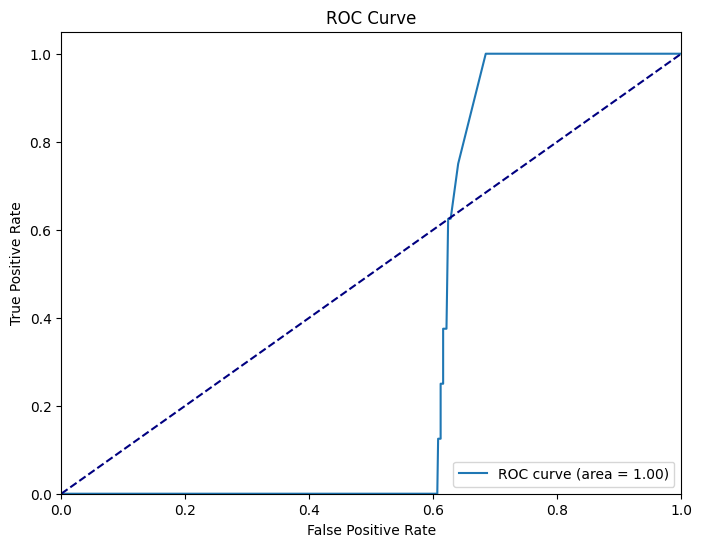

(0.006666666666666667,
 5.09683995922528e-05,
 0.006666666666666667,
 0.00010116337885685381,
 0.999995178585204)

In [16]:
# Menampilkan plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')  # Menampilkan kurva ROC
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Garis referensi untuk prediksi acak
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')  # Sumbu X untuk False Positive Rate
plt.ylabel('True Positive Rate')   # Sumbu Y untuk True Positive Rate
plt.title('ROC Curve')  # Judul grafik
plt.legend(loc="lower right")  # Menampilkan legenda di pojok kanan bawah
plt.show()

# Menampilkan hasil metrik evaluasi
accuracy, precision, recall, f1, auc